aim to plot change in gradient as consider changing minimum magntiude of data

In [2]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import obspy
import pickle
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import pandas as pd
import math

import scipy
from tabulate import tabulate

import matplotlib
matplotlib.rcParams.update({'font.size': 20})

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from data_plotting_func import *
#from spearman_plotting_func import *

change magnitude limits, colors in functions file

In [5]:
filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr20']

"filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr5',\n             'eq_object_03s_bandpass_01_19_snr_20_blank_005_new_snr5', \n             'eq_object_03s_bandpass_01_19_snr_20_blank_01_new_snr5',\n             'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr5',\n             'eq_object_05s_bandpass_01_19_snr_20_blank_005_new_snr5', \n             'eq_object_05s_bandpass_01_19_snr_20_blank_01_new_snr5',\n             'eq_object_05s_bandpass_01_19_snr_20_blank_025_new_snr5',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr5', \n             'eq_object_1s_bandpass_01_19_snr_20_blank_005_new_snr5',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_01_new_snr5',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_025_new_snr5',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_05_new_snr5',\n              'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr5',\n              'eq_object_4s_bandpass_01_19_snr_20_blank_005_new_snr5',\n     

## all on one plot

In [6]:
%matplotlib inline
for f in filenames[0:1]:
    print(f)
    df = pd.read_pickle(f'{paths.base_path}/paper_data/{f}')

    x_tp, y_tp = calc_tp_mag_lim(df, 3.,n=2)
    x_pgd, y_pgd = calc_pgd_mag_lim(df, 3.,n=2)
    x_tc, y_tc = calc_tc_mag_lim(df, 3.,n=2)
    x_iv2, y_iv2 = calc_iv2_mag_lim(df, 3.,n=2)


eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20


In [8]:
m49 = df.loc[(df.eq_mag<5.0)&(df.eq_mag>=4.9)]

In [9]:
m50 = df.loc[(df.eq_mag>=5.0)&(df.eq_mag<5.1)]

In [10]:
x49, y49 = calc_tp_mag_lim(m49, 4.8,n=1)

In [11]:
np.std(y49)

0.23077986350019244

In [12]:
x50, y50 = calc_tp_mag_lim(m50, 4.9,n=1)

In [13]:
np.std(y50)

0.26247571262679875

In [14]:
m_2019 = df.loc[df['eq_time'].str.startswith("2019")]

saved to path


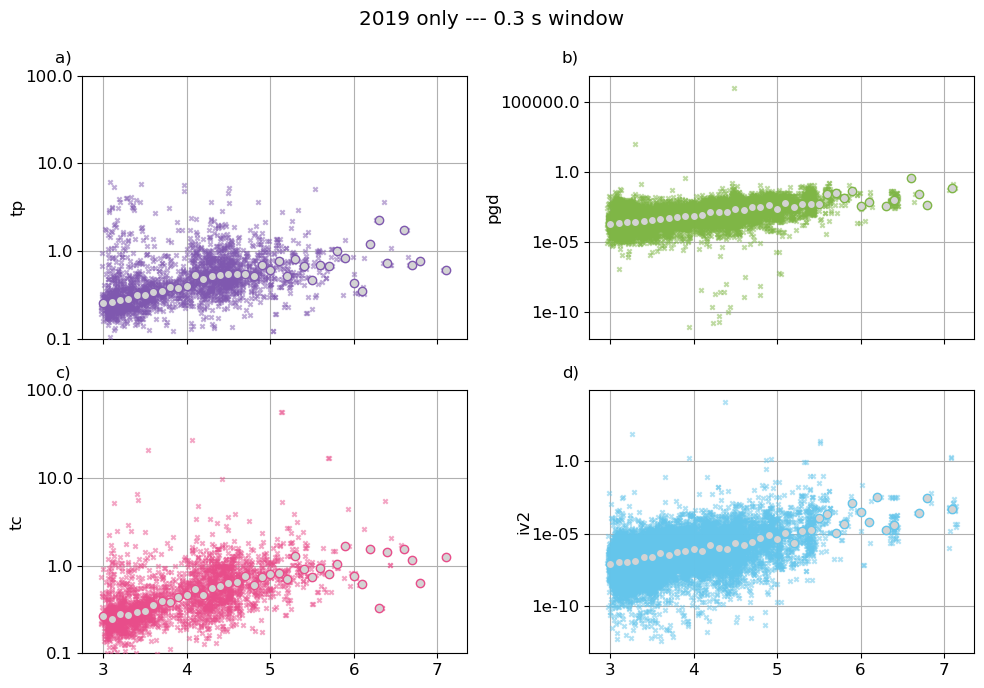

In [15]:
x_tp, y_tp = calc_tp_mag_lim(m_2019, 3.,n=1)
x_pgd, y_pgd = calc_pgd_mag_lim(m_2019, 3.,n=1)
x_tc, y_tc = calc_tc_mag_lim(m_2019, 3.,n=1)
x_iv2, y_iv2 = calc_iv2_mag_lim(m_2019, 3.,n=1)
figure = plot_data_subplots([x_tp, x_pgd, x_tc, x_iv2], [y_tp, y_pgd, y_tc, y_iv2], ['tp','pgd','tc','iv2'],f, title = '2019 only', save = False)


In [23]:
y_by_year = []
years = np.arange(2005, 2021, 1)
x_by_year = []
for year in years:
    m = df.loc[df['eq_time'].str.startswith(str(year))].loc[df.eq_mag>=5.0]
    x_tp, y_tp = calc_tp_mag_lim(m, 3.,n=1)
    y_by_year.append(y_tp)
    x_by_year.append(x_tp)

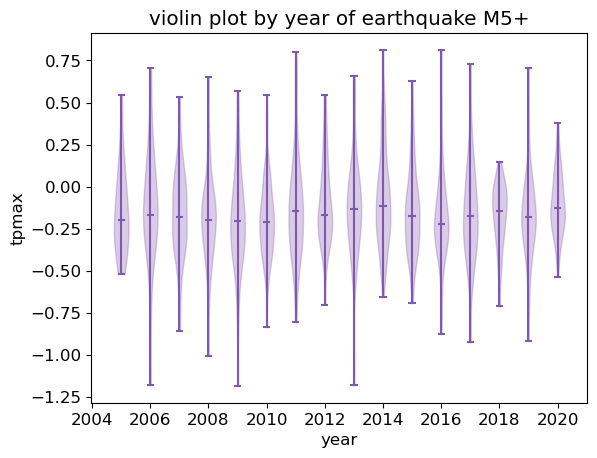

In [20]:
violin_parts = plt.violinplot(y_by_year, positions=years, vert=True, widths=0.5, showmeans=False, showextrema=True, showmedians=True, quantiles=None)
for pc in violin_parts['bodies']:
    pc.set_facecolor('#7f58af')
    pc.set_edgecolor('#7f58af')
violin_parts['cmaxes'].set_edgecolor('#7f58af')
violin_parts['cbars'].set_edgecolor('#7f58af')
violin_parts['cmedians'].set_edgecolor('#7f58af')
violin_parts['cmins'].set_edgecolor('#7f58af')

plt.title('violin plot by year of earthquake M5+')
plt.ylabel('tpmax')
plt.xlabel('year')


In [18]:
dataset_2 = []
x_tp, y_tp = calc_tp_mag_lim(m_2019, 3.,n=1)
dataset_2.append(y_tp)
x_tp, y_tp = calc_tp_mag_lim(m_2019.loc[(df.eq_mag>=4.9)&(df.eq_mag<5.0)], 3.,n=1)
dataset_2.append(y_tp)
x_tp, y_tp = calc_tp_mag_lim(m_2019.loc[(df.eq_mag>=5.0)&(df.eq_mag<5.1)], 3.,n=1)
dataset_2.append(y_tp)


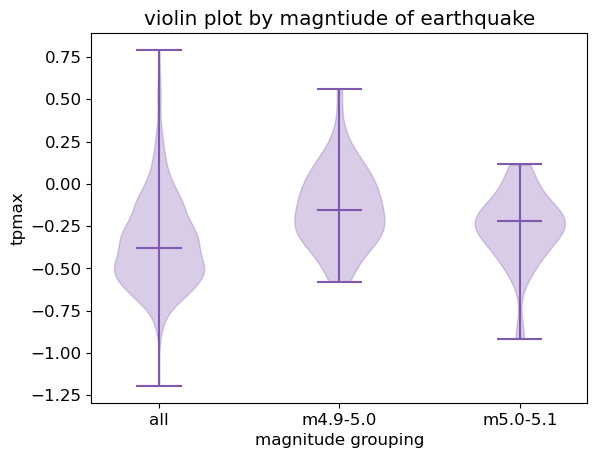

In [21]:
violin_parts = plt.violinplot(dataset_2, vert=True, widths=0.5, showmeans=False, showextrema=True, showmedians=True)
for pc in violin_parts['bodies']:
    pc.set_facecolor('#7f58af')
    pc.set_edgecolor('#7f58af')
violin_parts['cmaxes'].set_edgecolor('#7f58af')
violin_parts['cbars'].set_edgecolor('#7f58af')
violin_parts['cmedians'].set_edgecolor('#7f58af')
violin_parts['cmins'].set_edgecolor('#7f58af')

plt.xticks([1,2,3],['all','m4.9-5.0','m5.0-5.1'])
plt.title('violin plot by magntiude of earthquake')
plt.ylabel('tpmax')
plt.xlabel('magnitude grouping')
